# Optimization Process

### Load cases, run once at each load case

It is suggested to run once with a specific load case you want to design and then just re run multiple times the cell below this one (the one where you change the thicknesses)

In [2]:
from variables import *
from wp4_1 import Aerodynamics, InternalForces
from wp4_2 import WingBox


xflr_files = 'XFLRdata\\XFLR5sims'

# change these
aircraft_mass = 35688
alt_sound_speed = 296.56

internal_forces = InternalForces(aircraft_mass=aircraft_mass, load_factor= load_factor, sound_speed=alt_sound_speed, half_chord_sweep= hchord_sweep, fus_radius=fus_radius, density=rho0, airspeed= airspeed, 
                                 c_r= c_r, wingspan= b, engine_z_loc= engine_z_loc, engine_length= engine_length, x_hl= x_hl, x_lemac= x_lemac, MAC= MAC, 
                                 one_engine_thrust= one_engine_thrust, fan_cowl_diameter= fan_cowl_diameter, c_t= c_r*tr)
    
    
g_shear, g_moment, g_torque, g_axial = internal_forces.force_diagrams(engine_mass=engine_mass, wing_box_length=wing_box_length, 
                                        fuel_tank_length=fuel_tank_length, fuel_density=fuel_density)[4:]


Now defining the wingbox, you can finally change the thicknesses here!

In [13]:
import pandas as pd
wingbox = WingBox(c_r= c_r, c_t = None, wingspan=b, area_factor_flanges=12, intersection= intersection, tr= tr, t_spar= 0.008, t_caps= 0.004)

stringers = [8, 1, 'I', {'base':30e-3, 'top':30e-3, 'web height':30e-3, 'thickness top':2e-3, 'thickness web':2e-3, 'thickness base':2e-3}]
# [20, 1, 'L', {'base': 30e-3, 'height': 30e-3, 'thickness base': 2e-3, 'thickness height': 2e-3}]
# [8, 1, 'I', {'base':, 'top':, 'web height':, 'thickness top':, 'thickness web':, 'thickness base':}]
# if I stringer chosen use this
# 
wingbox.show(wingbox.z, loads= [g_moment, g_torque], moduli= [E, G], stringers= stringers, limits=[0, 10], plot= False, degrees= True, 
             save=False, filename=None)
# if you wanna save the plot just set save=True and put some filename.png i.e. filename= 'thickness2.png'
df = wingbox.deflections

df.to_csv('option5.csv')
# saving all data in a pandas dataframe to plot successively

Wing span modified goes from 0 to 12.08
Max Tip Displacement OK Displacement = 3.2556076915674637 12.10263082367087 (% Wingspan)
Wing Tip Max. Rotation Allowed Max displacement = 8.96168059702322


## Plotting

<>:13: SyntaxWarning: invalid escape sequence '\o'
<>:13: SyntaxWarning: invalid escape sequence '\o'
C:\Users\feder\AppData\Local\Temp\ipykernel_21168\1933434106.py:13: SyntaxWarning: invalid escape sequence '\o'
  plt.savefig('designs\option9\option9_-1grotation.png')


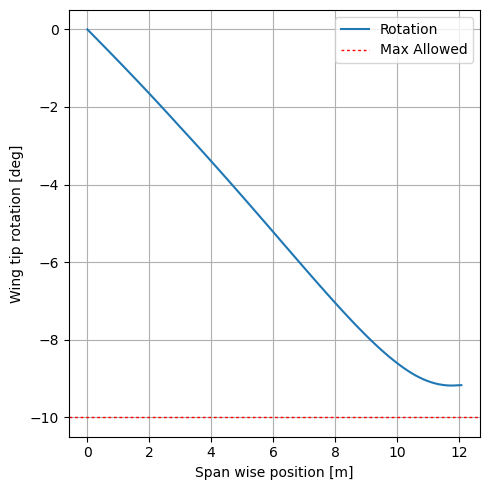

In [7]:
import matplotlib.pyplot as plt
import numpy as np
wingspan_og = wingbox.wingspan_og

plt.figure(figsize=(5, 5))
plt.plot(df['z location [m]'], df['Rotation [deg]'], label= 'Rotation')
plt.axhline(y = np.sign(df['Rotation [deg]'].iloc[-1])*10, color = 'r', linestyle = '-', lw= 1, dashes=[2, 2], label='Max Allowed')
plt.xlabel("Span wise position [m]")
plt.ylabel("Wing tip rotation [deg]")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('designs\option9\option9_-1grotation.png')
plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:10: SyntaxWarning: invalid escape sequence '\o'
C:\Users\feder\AppData\Local\Temp\ipykernel_21168\388294430.py:10: SyntaxWarning: invalid escape sequence '\o'
  plt.savefig('designs\option9\option9_-1gdisplacement.png')


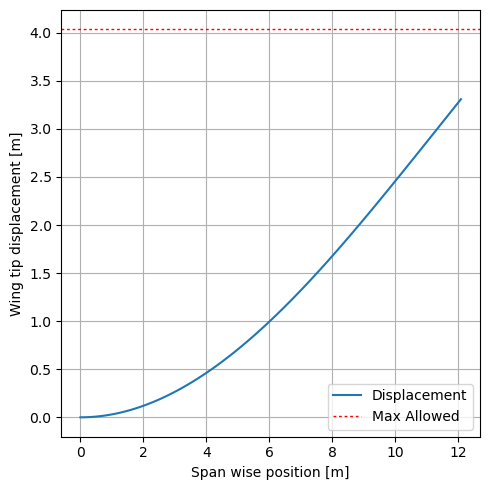

In [6]:
plt.figure(figsize=(5, 5))
plt.plot(df['z location [m]'], df['Displacement [m]'], label='Displacement')
plt.axhline(y = np.sign(df['Displacement [m]'].iloc[-1])*0.15*wingspan_og, color = 'r', linestyle = '-', lw= 1, dashes=[2, 2], label='Max Allowed')

plt.xlabel("Span wise position [m]")
plt.ylabel("Wing tip displacement [m]")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('designs\option9\option9_-1gdisplacement.png')
plt.show()


In [14]:
design2 = pd.read_csv('option5.csv')
design1 = pd.read_csv('option8.csv')
design3 = pd.read_csv('option9.csv')

design2.columns

Index(['Unnamed: 0', 'z location [m]', 'Polar moment of Inertia J [mm^4]',
       'Displacement [m]', 'Rotation [rad]', 'Rotation [deg]'],
      dtype='object')

In [ ]:
plt.plot(design1['z location [m]'], )